In [1]:
from __future__ import division
from IO import *
from cycler import cycler
import matplotlib as mpl
%matplotlib inline
from numba import autojit

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
# Instantiate classes
cortex = Cortex()
trn = TRN()
gr = GRAPH(cortex)

# styling
gammaColor = '#00cc99'

def xax(gamma, duration):
    x= np.arange(0,(duration-1)/1000,(duration)/1000/len(gamma) )
    return x

@autojit
def resonanceFS(F, tauv=15):
    T = 2000
    dt = 1
    t = np.arange(0, T, dt)
    F = np.logspace(0.5, 2.3, 200)

    res_var = np.empty(len(F), dtype=np.float64)
    b = 2
    for k, f in enumerate(F):
        A = 0.01
        I = A * np.cos(2 * np.pi * f * t / 1000)
        res_v = []
        res_u = []
        u = 0
        t_rest = 0

        # izh neuron model for cortical fast spiking neurons (that burst)
        v = -60
        for i in range(len(t)):
            v += dt / tauv * ((v + 60) * (v + 50) - 20 * u + 8 * I[i])
            u += dt * 0.044 * ((v + 55) - u)
            if v > 25:
                v = -40
                u += 50
            if i * dt > 1500:
                res_v.append(v / A)

        var = np.var(res_v)
        #         var = np.max(res_v)-np.min(res_v)
        res_var[k] = var
    return res_var



In [4]:
# #-------------------------------
# # PARAMS SEARCH
# #-------------------------------
c = cortex
c.N = 400
c.g = 10
c.d1 = 10
c.d2 = 30000
c.d3 = 10
c.initTime()
c.sigma = 60
c.WII = 1400 #2800
c.S = 100
c.model = "gp-izh-subnetworks"
c.glob = 0

# shared weights
c.sG = 10
c.sWII = 10

c.FACT = 1
c.r=0

c.ratio = 15
c.LTD  = 1e-0*4.7e-6 * c.FACT * c.N
c.LTP = c.ratio * c.LTD

c.tauv=15

c.with_currents = True

# for S in np.arange(50,400,50):
#     Parallel(n_jobs=8)(delayed(cortex.runSimulation)(N,0, G, S, d1, d2, d3, before, after, sigma, \
# WII, LTP, LTD) for G in np.linspace(1,9,"8))

sWIIList = [0,10]
sGList = [0,1,5,10,15,20,25]
sGList = np.arange(0,25,4)
LTDList = [1e-9*4.7e-6 * c.FACT * c.N, 1e-0*4.7e-6 * c.FACT * c.N]
taulist = np.arange(11,95,4)

# cortex.runSimulation()

# c.readSimulation()
# gr.plotWeights(tauv = c.tauv)


# for c.d2 in [60000]:
#     for c.sWII in sWIIList:
#         for c.sG in sGList:
#             for c.LTD in LTDList:
#                 c.LTP = c.ratio * c.LTD
#                 Parallel(n_jobs=8)(delayed(c.runSimulation)(i=0, tauv=c.tauv) for c.tauv in taulist)

# df = pd.DataFrame(columns = ['tauv', 'd2','sWII', 'sG', 'LTD',
#                              'maxBegin', 'argmaxBegin', 'maxEnd', 'argmaxEnd',
#                             'f1Begin', 'p1Begin', 'f2Begin', 'p2Begin', 
#                              'f1End', 'p1End', 'f2End', 'p2End', 
#                              'fBothStart', 'pBothStart', 'fBothEnd', 'pBothEnd', 'key'])
# i=0
# for c.tauv in taulist:
#     for c.d2 in [60000]:
#         for c.sWII in sWIIList:
#             for c.sG in sGList:
#                 for c.LTD in LTDList:
#                     c.LTP = c.ratio * c.LTD
#                     print(c.tauv, c.sWII, c.sG)
#                     c.readSimulation()
#                     csd = gr.valCSD()
#                     if c.tauv <=35 and c.sG<=10:
#                         key=-2
#                     elif c.tauv>35 and c.sG<=10:
#                         key=-1
#                     elif c.tauv<=35 and c.sG>10:
#                         key=2
#                     elif c.tauv>35 and c.sG>10:
#                         key=1
#                     else:
#                         key=0
#                     df.loc[i] = [c.tauv, c.d2, c.sWII, c.sG, c.LTD>1e-8, 
#                                  csd['maxBegin'], csd['argmaxBegin'], csd['maxEnd'], csd['argmaxEnd'],
#                                 csd['f1Begin'][0], csd['f1Begin'][1], csd['f2Begin'][0], csd['f2Begin'][1],
#                                 csd['f1End'][0], csd['f1End'][1], csd['f2End'][0], csd['f2End'][1],
#                                  csd['fBothBegin'][0], csd['fBothBegin'][1], csd['fBothEnd'][0], csd['fBothEnd'][1],
#                                 key]
#                     i+=1
# print(i)
    
# df.to_csv(DIRECTORY+'df-plast-ok.csv')


-1   1

-2   2

In [5]:
# df.to_csv(DIRECTORY+'df-extended.csv')

In [6]:
# df = pd.read_csv('/Users/GP1514/Dropbox/0000 - PhD/figures/20160615/'+'df-extended8000plast-ok2.csv')
# df = pd.read_csv(DIRECTORY + 'df-plast-ok2.csv')
df = pd.read_csv('/Users/GP1514/Dropbox/0000 - PhD/figures/20160628/' + 'df-plast-ok2.csv')
df = df[(df['tauv']>13)]

In [7]:
df['fBothBegin'] = df['fBothStart']
df['pBothBegin'] = df['pBothStart']

In [8]:
# df.to_csv(DIRECTORY+'df-extended8000plast-ok.csv')

In [9]:
dfplast = df[(df['LTD']==True)]
dfnoplast = df[(df['LTD']==False)]
dfplast.head()
# dfnoplast.tail()

,Unnamed: 0,tauv,d2,sWII,sG,LTD,maxBegin,argmaxBegin,maxEnd,argmaxEnd,...,p1End,f2End,p2End,fBothStart,pBothStart,fBothEnd,pBothEnd,key,fBothBegin,pBothBegin
121,121,15.0,60000.0,0.0,0.0,True,26.705438,12.0,40.628102,12.0,...,23.814467,45.977011,20.572097,41.979010,24.249512,47.976012,25.219558,-2.0,41.979010,24.249512
123,123,15.0,60000.0,0.0,2.0,True,30.466814,12.0,33.340174,12.0,...,23.081767,50.974513,22.074026,47.976012,24.869793,50.974513,24.625573,-2.0,47.976012,24.869793
125,125,15.0,60000.0,0.0,4.0,True,41.580482,12.0,71.625321,12.0,...,23.560492,44.977511,25.363960,47.976012,29.616338,45.977011,30.158294,-2.0,47.976012,29.616338
127,127,15.0,60000.0,0.0,6.0,True,58.981964,12.0,53.492279,11.0,...,20.570106,40.979510,16.665583,45.977011,29.105256,50.974513,22.891694,-2.0,45.977011,29.105256
129,129,15.0,60000.0,0.0,8.0,True,93.726549,11.0,73.877806,11.0,...,26.706665,43.978011,25.999942,47.976012,28.460169,43.978011,32.032078,-2.0,47.976012,28.460169


In [10]:
c = cortex
c.with_currents = True
c.g = 10
c.d1 = 10
c.d2 = 60000
c.d3 = 10
c.T = 60020
c.tauv = 65
c.sG=0
c.sWII=0
# c.runSimulation(tauv=c.tauv)
gr.plotWeights(tauv=c.tauv)

AttributeError: 'Cortex' object has no attribute 'dt'

In [ ]:
c = cortex
c.with_currents = True
c.g = 10
c.d1 = 10
c.d2 = 1000
c.d3 = 10
c.T = 1020
c.tauv = 65
c.sG=10
c.sWII=0
c.runSimulation(tauv=c.tauv)
# gr.plotWeights(tauv=c.tauv)
plt.plot(xax(c.gamma, c.T), c.gamma, color='g')
plt.plot(xax(c.gammaN1, c.T), c.gammaN1*(1+4*c.sG/c.N), color='r')
plt.plot(xax(c.gammaN2, c.T), c.gammaN2*(1+4*c.sG/c.N), color='c')

# for c.sG in sGList:
#     c.runSimulation(tauv=c.tauv)
#     c.readSimulation()
#     fig = plt.figure(figsize=(8,4))
#     ax0 = fig.add_subplot(111)
#     ax0.plot(xax(c.gamma, c.T), c.gamma, color='g')
#     ax0.plot(xax(c.gammaN1, c.T), c.gammaN1, color='r')
#     ax0.plot(xax(c.gammaN2, c.T), c.gammaN2, color='c')
#     plt.savefig(DIRECTORY+'gammaevol-sg%s.pdf'%str(c.sG))

In [ ]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
gr.plotCoherence(df,sG=0, ax=ax1)
gr.plotCoherence(df,sG=20, ax=ax2)
gr.plotArgCoherence(df,sG=0, ax=ax3)
gr.plotArgCoherence(df,sG=20, ax=ax4)
plt.savefig(DIRECTORY + 'cor.png')

In [ ]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
gr.plotSGCoherence(df,tauv=15, ax=ax1)
gr.plotSGCoherence(df,tauv=35, ax=ax2)
gr.plotSGCoherence(df,tauv=55, ax=ax3)
gr.plotSGCoherence(df,tauv=85, ax=ax4)
plt.savefig(DIRECTORY + 'corSG.png')

In [ ]:
c.tauv = 85
c.sG = 5
c.dt =0.25
c.sWII = 10
c.readSimulation()
gr.plotWeights(c.tauv)

In [ ]:
print(gr.fourier(c.i1[0:4000]))
print(gr.fourier(c.i2[0:4000]))
print(gr.fourier(c.i1[-4000:-1]))
print(gr.fourier(c.i2[-4000:-1]))

In [ ]:
c.LTD  = 1e-9*4.7e-6 * c.FACT * c.N
c.LTP = c.ratio * c.LTD
c.tauv=31
c.readSimulation()

plt.plot(c.i2[500:1500], color='c')
plt.plot(c.i1[500:1500])
plt.savefig(DIRECTORY+'i_start-sg10.pdf')

In [ ]:
plt.plot(c.i2[-3000:-2000], color='c')
plt.plot(c.i1[-3000:-2000])
plt.savefig(DIRECTORY+'i_end-sg10.pdf')

In [ ]:
dfnoplast.head()

# Subnetwork Frequencies

In [ ]:
gr.plotEvolution(df, kind = 'frequency', LTD=True)
gr.plotEvolution(df, kind = 'frequency', LTD=False)

In [ ]:
gr.plotEvolution(df, kind='power', LTD=True)
gr.plotEvolution(df, kind='power', LTD=False)

In [ ]:
gr.plotCoherenceEvolution(df, kind='max', LTD=True)
gr.plotCoherenceEvolution(df, kind='max', LTD=False)


In [ ]:
gr.plotCoherenceEvolution(df, kind='argmax', LTD=True)
gr.plotCoherenceEvolution(df, kind='argmax', LTD=False)

(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)


0

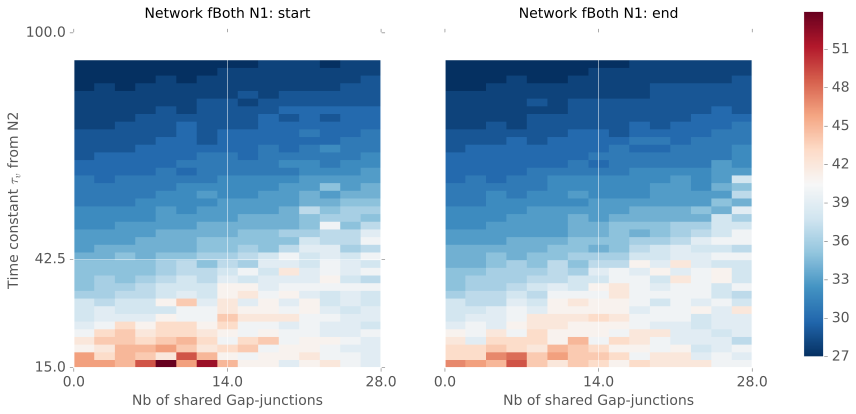

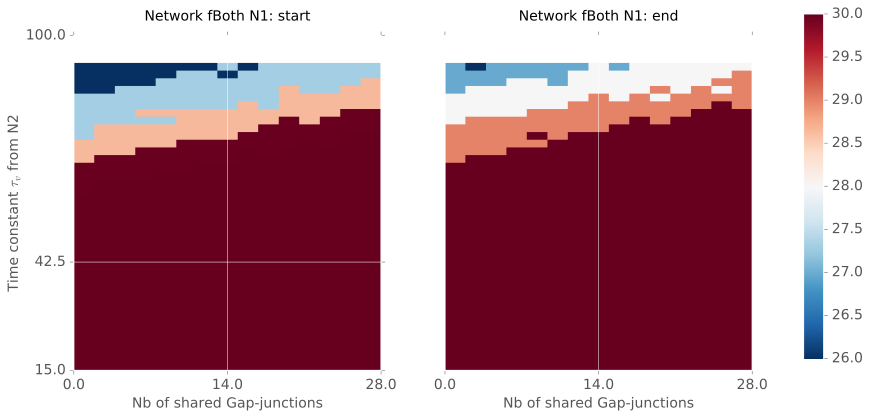

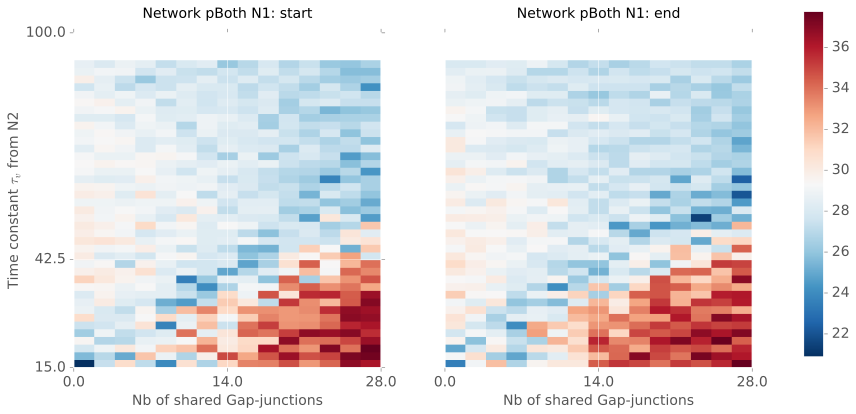

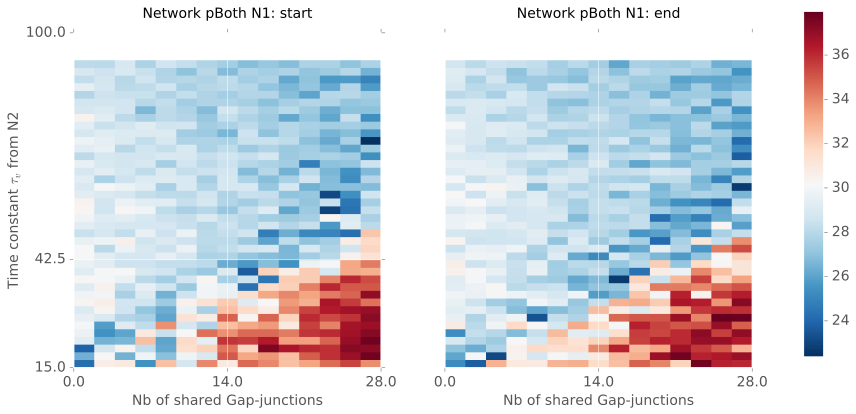

In [31]:
gr.plotCoherenceEvolution(df, kind='fBoth', LTD=True)
gr.plotCoherenceEvolution(df, kind='fBoth', LTD=False, vmax=dfplast['fBothEnd'].max())

gr.plotCoherenceEvolution(df, kind='pBoth', LTD=True)
gr.plotCoherenceEvolution(df, kind='pBoth', LTD=False)

In [ ]:
# def plotChange(dataframe, kind='max',network = '', both=None, vmin=None, vmax=None, sWII=10, title=""):
#     fig = plt.figure(figsize=(8,6))

    
#     df = dataframe
#     df = df[(df['LTD']==True)& (df['sWII']==sWII)]
#     extent = [np.min(df['sG']), np.max(df['sG']), np.min(df['tauv']), np.max(df['tauv'])]

#     ax1 = fig.add_subplot(111)

#     cmap = plt.cm.RdYlGn

#     title = r'%s'%(title)
#     column = kind + 'Begin'
#     filename = column + '.pdf'
#     ax1, im = gr.plotDiagramChangeCSD(fig, ax1, df, title, 
#                                       kind, filename, extent=extent, cmap = cmap, both=both,
#                                      vmin=vmin, vmax=vmax)

#     fig.subplots_adjust(right=0.95)
#     cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
#     cbar = fig.colorbar(im, cax=cbar_ax)

#     plt.savefig(DIRECTORY + kind + 'change_cluster.pdf')
    
# def plotChange2(dataframe, kind='max',network = '', title='', both=None, vmin=None, vmax=None, sWII=10):
#     fig = plt.figure(figsize=(8,12))
    
#     df = dataframe
#     df = df[(df['LTD']==True)& (df['sWII']==sWII)]
#     extent = [np.min(df['sG']), np.max(df['sG']), np.min(df['tauv']), np.max(df['tauv'])]

#     ax1 = fig.add_subplot(211)
#     ax2 = fig.add_subplot(212)
#     cmap = plt.cm.RdYlGn

#     title = r'%s'%(title)
#     column = kind + 'Begin'
#     filename = "".join(title.split(' ') )+ '.pdf'
#     ax1, im = gr.plotDiagramChangeCSD(fig, ax1, df, title, kind, filename, extent=extent, cmap = cmap,
#                                      both=both,
#                                      vmin=vmin, vmax=vmax)
    
#     title = r'%s'%(title)
#     column = kind[:-1] + '2Begin'
#     filename = "".join(title.split(' ') )+ '2.pdf'
#     ax2, im = gr.plotDiagramChangeCSD(fig, ax2, df, title, kind[:-1] + '2', filename, extent=extent, cmap = cmap,
#                                      both=both,
#                                      vmin=vmin, vmax=vmax)
    
#     ax2.set_title('')
#     ax1.set_xticks([])
#     ax1.set_xlabel("")
#     fig.subplots_adjust(right=0.95)
#     cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
#     cbar = fig.colorbar(im, cax=cbar_ax)
#     plt.tight_layout()
#     plt.savefig(DIRECTORY + kind + 'both_change_cluster.pdf')

/Users/GP1514/.pyenv/versions/anaconda3-2.5.0/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


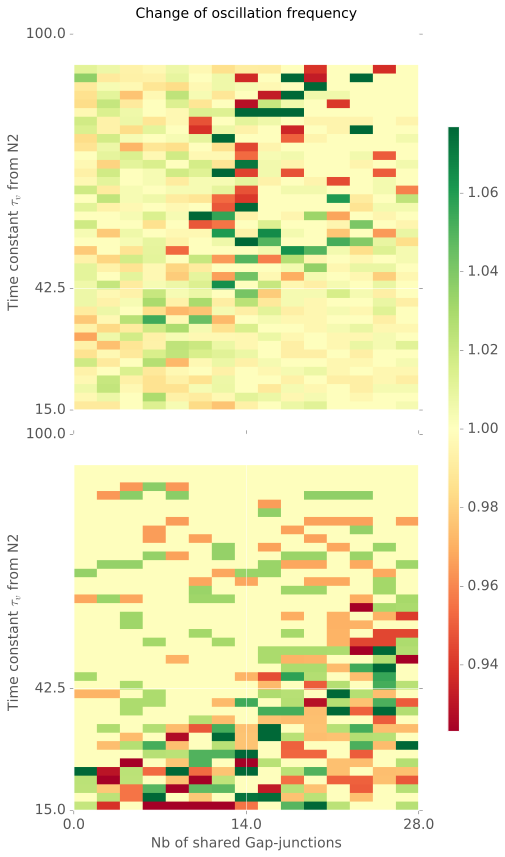

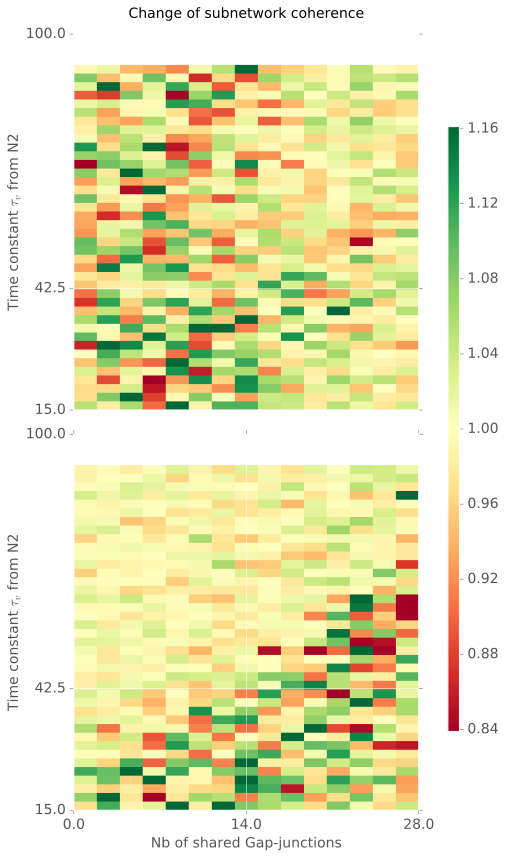

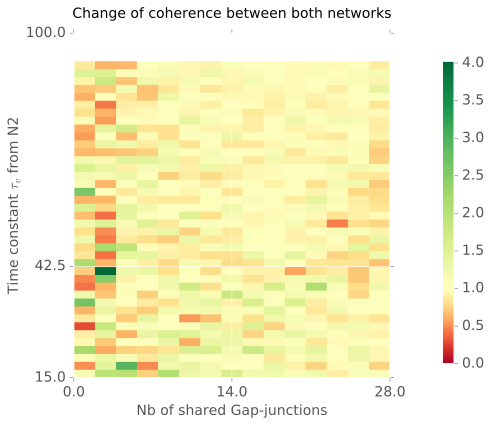

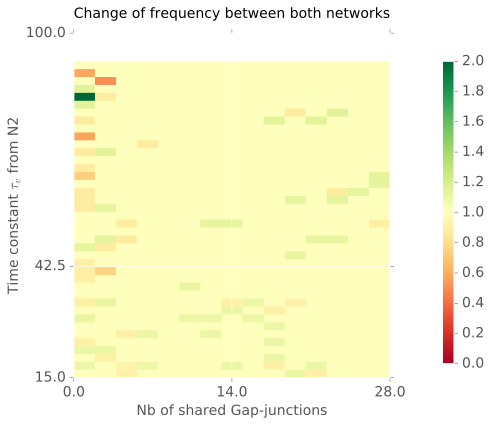

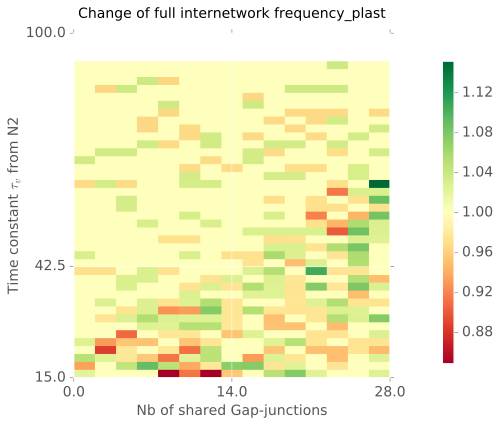

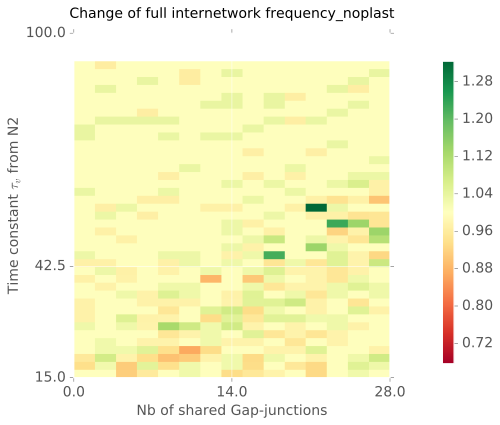

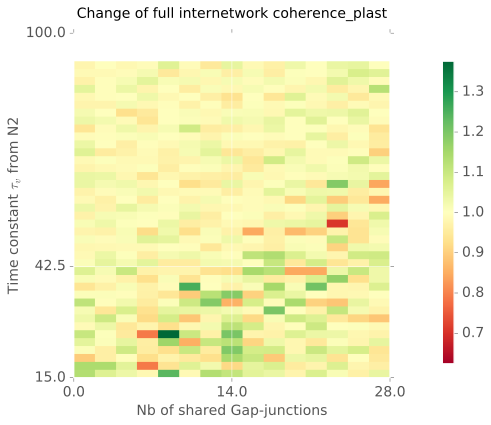

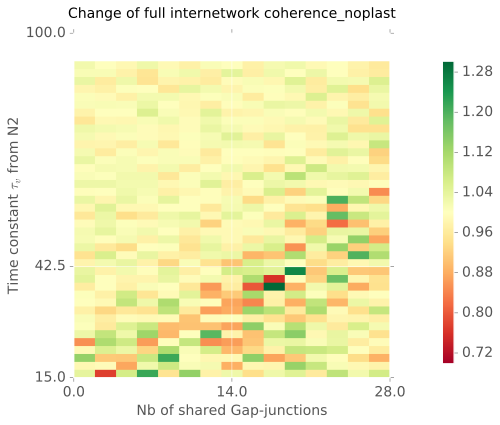

In [14]:
gr.plotChange2(df, 'f', 'N1', both=True, title='Change of oscillation frequency', sWII=10, LTD=True)
gr.plotChange2(df, 'p', 'N1', both=True, title='Change of subnetwork coherence', sWII=10)
# plotChange('f1', 'N1')
# plotChange('f1', 'N1', both=True)
# plotChange('f2', 'N2', both=True)
# plotChange('p1', 'N1', both=True)
# plotChange('p2', 'N2', both=True)
gr.plotChange(df, 'max', title="Change of coherence between both networks")
gr.plotChange(df, 'argmax', title="Change of frequency between both networks")
gr.plotChange(df, 'fBoth', title="Change of full internetwork frequency_plast", LTD=True)
gr.plotChange(df, 'fBoth', title="Change of full internetwork frequency_noplast", LTD=False)

gr.plotChange(df, 'pBoth', title="Change of full internetwork coherence_plast", LTD=True)
gr.plotChange(df, 'pBoth', title="Change of full internetwork coherence_noplast", LTD=False)




## Plot difference between with and without plasticity

In [ ]:
gr.plotChangePlast2(df, 'f', 'N1', both=True, title='Change of oscillation frequency', sWII=10)
plt.savefig(DIRECTORY+'f_changeplast.pdf')
plt.figure()
gr.plotChangePlast2(df, 'p', 'N1', both=True, title='Change of subnetwork coherence', sWII=10)
plt.savefig(DIRECTORY+'p_changeplast.pdf')


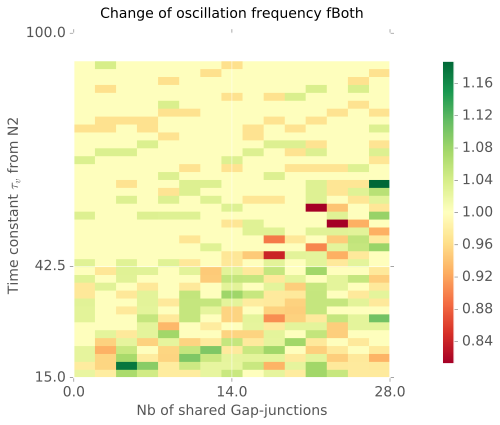

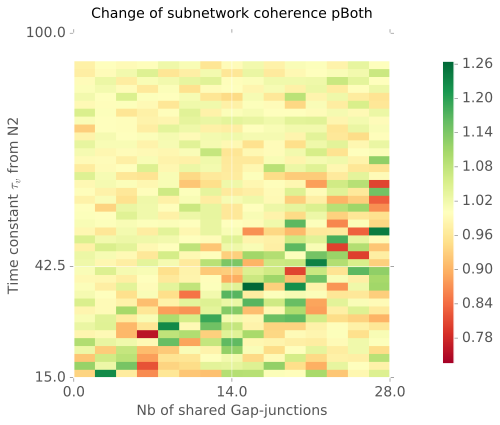

In [13]:
# gr.plotChangePlast(df, 'max', title='Change of oscillation frequency', sWII=10, vmax=1.3)
# gr.plotChangePlast(df, 'argmax', title='Change of subnetwork coherence', sWII=10)
gr.plotChangePlast(df, 'fBoth', title='Change of oscillation frequency fBoth', sWII=10)
plt.savefig(DIRECTORY+'change_of_fBoth_plast_vs_noplast.pdf')
plt.figure()
gr.plotChangePlast(df, 'pBoth', title='Change of subnetwork coherence pBoth', sWII=10)
plt.savefig(DIRECTORY+'change_of_pBoth_plast_vs_noplast.pdf')


In [ ]:
# c = cortex
c.with_currents = True
c.N = 300
c.g = 10
c.d1 = 10
c.d2 = 1012
c.d3 = 10
c.T = 1020
c.tauv = 15
c.sG=20
c.sWII=0
c.dt=0.25
# c.runSimulation(tauv=c.tauv)
# c.readSimulation()
# gr.plotWeights(tauv=c.tauv)

In [ ]:
t0 = t.time()

c.runSimulation(tauv=c.tauv)
print(t.time()-t0)

In [ ]:
c.readSimulation()
plt.plot(c.voltage)

In [19]:
c.dt = 0.25
c.N = 400
c.g = 10
c.d1 = 10
c.d2 = 30000
c.d3 = 10
c.initTime()
c.sigma = 60
c.WII = 1400 #2800
c.S = 100
c.model = "gp-izh-subnetworks"
c.glob = 0

# shared weights
c.sG = 10
c.sWII = 10

c.FACT = 1
c.r=0

c.ratio = 15
c.LTD  = 1e-0*4.7e-6 * c.FACT * c.N
c.LTP = c.ratio * c.LTD

c.tauv=15

c.with_currents = True

# for S in np.arange(50,400,50):
#     Parallel(n_jobs=8)(delayed(cortex.runSimulation)(N,0, G, S, d1, d2, d3, before, after, sigma, \
# WII, LTP, LTD) for G in np.linspace(1,9,"8))

sWIIList = [0,10]
sGList = [0,1,5,10,15,20,25]
sGList = np.arange(0,25,4)
LTDList = [1e-9*4.7e-6 * c.FACT * c.N, 1e-0*4.7e-6 * c.FACT * c.N]
taulist = np.arange(11,95,4)
c.LTD = LTDList[0]
c.sG = sGList[0]
c.LTP = c.ratio * c.LTD
c.readSimulation()

can't find:	 /Users/GP1514/Dropbox/ICL-2014/Code/C-Code/cortex/data/gamma_g-10_TImean-30_T-30020_Glob-0_dt-0.25_N-400_r-0_S-100_WII-1400_LTD-1.88e-12_LTP-2.82e-11_model-gp-izh-subnetworks_sG-0_sWII-10_tauv-15_0.txt


FileNotFoundError: [Errno 2] No such file or directory: '/Users/GP1514/Dropbox/ICL-2014/Code/C-Code/cortex/data/v_g-10_TImean-30_T-30020_Glob-0_dt-0.25_N-400_r-0_S-100_WII-1400_LTD-1.88e-12_LTP-2.82e-11_model-gp-izh-subnetworks_sG-0_sWII-10_tauv-15_0.txt'

In [25]:
dfnoplast['fBothEnd'].var()

25.54573228495169

In [29]:
c.d2 = 1000
c.N = 100
c.after = 1000
c.dt=0.25
c.LTD = LTDList[1]*10
c.LTP = c.LTD * c.ratio
c.T = c.d1+c.d2+c.d3
c.runSimulation()

./cortex -N 100 -ext _0.txt -d1 10 -d2 1000 -d3 10 -before 10 -after 1000 -S 100 -G 10 -s 60 -WII 1400 -LTP 0.28200000000000003 -LTD 0.0188 -model gp-izh-subnetworks -r 0 -global 0 -sG 10 -sWII 10 -tauv 15


In [30]:
c.readSimulation()
c.gammaN1

array([ nan,  nan,  nan, ...,   0.,   0.,   0.])

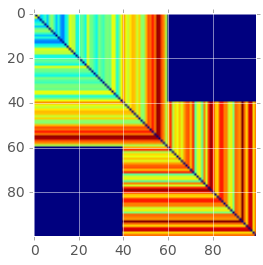

In [31]:
plt.imshow(c.readMatrix())